In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PySDM import Formulae
from PySDM.physics import si

aerosol data

In [4]:
aero_data = {'species' : ['SO4', 'NO3', 'Cl', 'NH4', 'MSA', 'ARO1', 'ARO2', 'ALK1', 'OLE1', 'API1', 'API2', 'LIM1', 'LIM2', 'CO3', 'Na', 'Ca ', 'OIN', 'OC', 'BC', 'H2O'],
             'density' : [1800, 1800, 2200, 1800, 1800, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 2600, 2200, 2600, 2600, 1000, 1800, 1000],
             'ions' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'molec_weight' : [96, 62, 35.5, 18, 95, 150,150, 140, 140, 184, 184, 200, 200, 60, 23, 40, 1, 1, 1, 18],
             'kappa' : [0.65, 0.65, 0.53, 0.65, 0.53, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.53, 0.53, 0.53, 0.1, 0.001, 0, 0]}
aero_file=pd.DataFrame(aero_data)

species = aero_file['species']
density = aero_file['density']
ions = aero_file['ions']
molec_weight = aero_file['molec_weight']
kappa = aero_file['kappa']
sgm_w = 72 * 1e-3 # N m-1
sgm_org = 40 * 1e-3 # N m-1
delta_min = 0.16 * 1e-9 # m 
univ_gas_const = 8.3144     #kg⋅m2⋅s−2⋅K−1⋅mol−1
water_density = 1e3           #kg/m3
water_molec_weight = 18e-3    #kg/mol
temp = 300                    #Kelvin

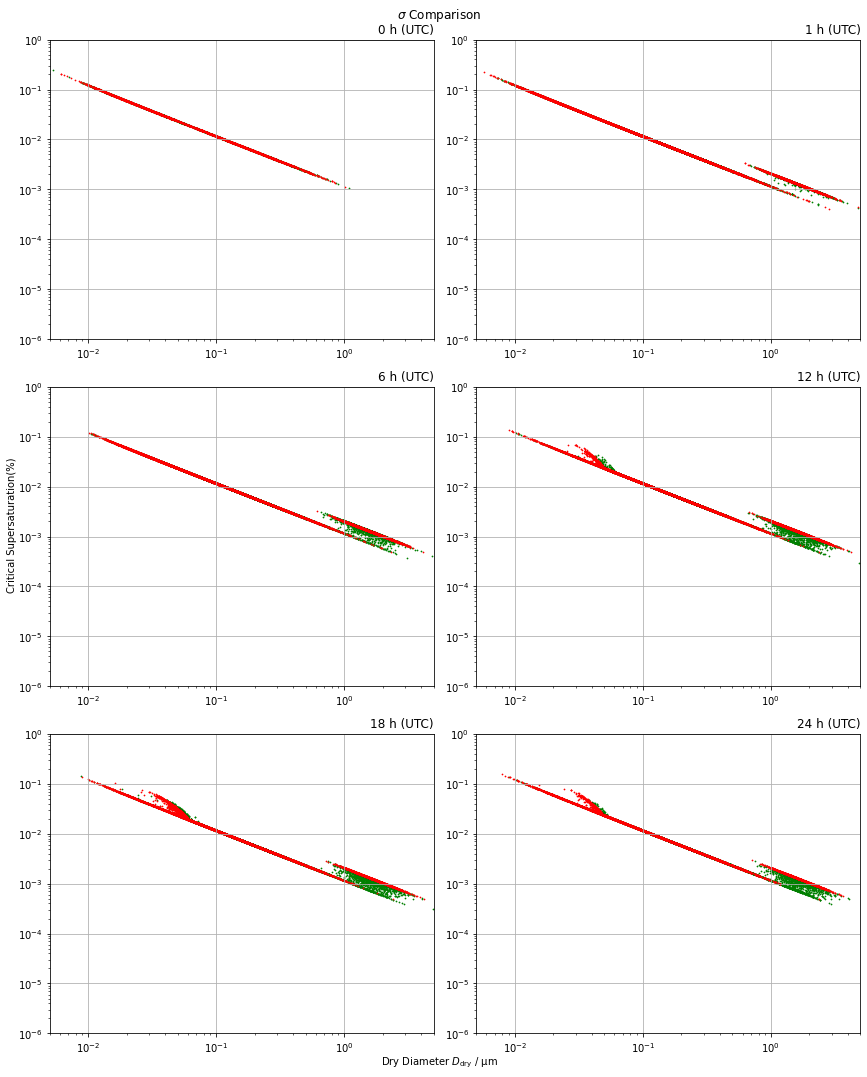

In [30]:
fig = plt.figure(figsize=(12,15))
hour = ["single_particle_00000001","single_particle_00000002","single_particle_00000007", \
        "single_particle_00000013","single_particle_00000019","single_particle_00000025"]

directory = ["/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation","/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/sgm40"]
color = ["g","r"]
for j in [0,1]:
    for subdir, dirs, files in os.walk(directory[j]):
        for file in files:
            filename = subdir + os.sep + file
            for i in np.arange(0,6):
                if (hour[i] in filename):
                    time_index = int(filename[-6:-4])
                    file = pd.read_csv(filename, sep='\s+', header=None)
                    data = file.set_index(0)
                    f = data.T
                    f = pd.DataFrame(f)  
                    dry_diameters = f.dry_diameters
                    masses = f.masses
                    dry_masses = f.dry_masses
                    bc_masses = f.bc_masses
                    oc_masses = f.oc_masses
                    so4_masses = f.so4_masses
                    no3_masses = f.no3_masses
                    nh4_masses = f.nh4_masses
                    soa_masses = f.soa_masses
                    cl_masses = f.cl_masses
                    msa_masses = f.msa_masses
                    aro1_masses = f.aro1_masses
                    aro2_masses = f.aro2_masses
                    alk1_masses = f.alk1_masses
                    ole1_masses = f.ole1_masses
                    api1_masses = f.api1_masses
                    api2_masses = f.api2_masses
                    lim1_masses = f.lim1_masses
                    lim2_masses = f.lim2_masses
                    co3_masses = f.co3_masses
                    na_masses = f.na_masses
                    ca_masses = f.ca_masses
                    oin_masses = f.oin_masses
                    h2o_masses = f.h2o_masses

                    v_SO4 = so4_masses/aero_file.iloc[0,1]
                    v_NO3 = no3_masses/aero_file.iloc[1,1]
                    v_Cl = cl_masses/aero_file.iloc[2,1]
                    v_NH4 = nh4_masses/aero_file.iloc[3,1]
                    v_MSA = msa_masses/aero_file.iloc[4,1]
                    v_ARO1 = aro1_masses/aero_file.iloc[5,1]
                    v_ARO2 = aro2_masses/aero_file.iloc[6,1]
                    v_ALK1 = alk1_masses/aero_file.iloc[7,1]
                    v_OLE1 = ole1_masses/aero_file.iloc[8,1]
                    v_API1 = api1_masses/aero_file.iloc[9,1]
                    v_API2 = api2_masses/aero_file.iloc[10,1]
                    v_LIM1 = lim1_masses/aero_file.iloc[11,1]
                    v_LIM2 = lim2_masses/aero_file.iloc[12,1]
                    v_CO3 = co3_masses/aero_file.iloc[13,1]
                    v_Na = na_masses/aero_file.iloc[14,1]
                    v_Ca = ca_masses/aero_file.iloc[15,1]
                    v_OIN = oin_masses/aero_file.iloc[16,1]
                    v_OC = oc_masses/aero_file.iloc[17,1]
                    v_BC = bc_masses/aero_file.iloc[18,1]
                    v_H2O = h2o_masses/aero_file.iloc[19,1]
                    v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                            v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
                    
                    kappa_single = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                                    v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                                    v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                                    v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                                    v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                                    v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                                    v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                                    v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                                    v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                                    v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4])/v_total

                    v_dry = v_total - v_H2O
                    v_wet = v_total
                    v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

                    r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
                    v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
                    v_beta = v_org
                    c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
                    sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

                    crit_ss = np.exp((4*sgm*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters))-1

                    
                    ax = plt.subplot(3,2,i+1)
                    
                    # plot Masses
                    # ax = plt.scatter(dry_diameters * 1e6, bc_masses, s = 2.5, linewidths = 0.1, c='r')
                    # plt.xlim(5e-3, 1e1)
                    # plt.ylim(1e-22, 1e-15)

                    # plot critcal supersaturation
                    ax = plt.scatter(dry_diameters * 1e6, crit_ss, s = 2.5, linewidths = 0.1, c=color[j])
                    plt.xlim(5e-3, 5e0)
                    plt.ylim(1e-6, 1e0)

                    plt.xscale("log")
                    plt.yscale('log')
                    plt.grid(True)
                    utc_time = time_index -1
                    plt.title(str(utc_time) + ' h (UTC)' , loc='right')

fig.suptitle("$\sigma$ Comparison")
fig.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$", ha='center')
fig.text(0, 0.5, r"Critical Supersaturation(%)", va='center', rotation='vertical')
plt.tight_layout()